In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/raw_data_files/T_FRRSA.csv')

data

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,RSA001,RSA001_UNIT,RSA001_NORM,RSA002,RSA003,RSA002_DT,patdeid
0,NaN,NaN,BASELINE,NaN,15031,1.0,NaN,1.0,NaN,NaN,-2.0,1
1,NaN,NaN,WK0,NaN,15034,1.0,NaN,1.0,NaN,NaN,0.0,1
2,NaN,NaN,WK1,NaN,15037,1.0,NaN,1.0,NaN,NaN,6.0,1
3,NaN,NaN,WK2,NaN,15040,1.0,NaN,1.0,NaN,NaN,16.0,1
4,NaN,NaN,WK3,NaN,15043,1.0,NaN,1.0,NaN,NaN,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27024,NaN,NaN,WK28,NaN,15109,1.0,NaN,1.0,NaN,NaN,189.0,1931
27025,NaN,NaN,WK32,NaN,15112,1.0,NaN,1.0,NaN,NaN,236.0,1931
27026,NaN,NaN,BASELINE,NaN,15031,1.0,NaN,1.0,NaN,NaN,NaN,1932
27027,NaN,NaN,BASELINE,NaN,15031,1.0,NaN,1.0,NaN,NaN,NaN,1933


In [3]:
# create list of columns to drop
keep_cols = [col for col in data.columns if col not in ['VISIT','patdeid','RSA001']]

# drop columns
data = data.drop(columns=keep_cols)

# create dict of columns to rename
rename_cols = {'RSA001':'attend_visit','RSA003':'comments'}

# rename columns
data = data.rename(columns=rename_cols) 

# move last column to first position
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

# replace 'BASELINE' with '0' in VISIT column
data['VISIT'] = data['VISIT'].str.replace('BASELINE','0')

# remove 'WK' from VISIT column
data['VISIT'] = data['VISIT'].str.replace('WK','')

# convert VISIT column to numeric
data['VISIT'] = pd.to_numeric(data['VISIT'])

data

,patdeid,VISIT,attend_visit
0,1,0,1.0
1,1,0,1.0
2,1,1,1.0
3,1,2,1.0
4,1,3,1.0
...,...,...,...
27024,1931,28,1.0
27025,1931,32,1.0
27026,1932,0,1.0
27027,1933,0,1.0


In [4]:
# create column total_rsa
data['total_rsa'] = data.groupby('patdeid')['attend_visit'].transform('sum').astype(int)

data

,patdeid,VISIT,attend_visit,total_rsa
0,1,0,1.0,26
1,1,0,1.0,26
2,1,1,1.0,26
3,1,2,1.0,26
4,1,3,1.0,26
...,...,...,...,...
27024,1931,28,1.0,26
27025,1931,32,1.0,26
27026,1932,0,1.0,1
27027,1933,0,1.0,1


In [5]:
# create function to call random number from patdeid column
def random_patient():
    return data['patdeid'].sample(n=1).iloc[0]

In [6]:
data.loc[data.patdeid==random_patient()]

,patdeid,VISIT,attend_visit,total_rsa
17241,1236,0,1.0,28
17242,1236,0,1.0,28
17243,1236,1,1.0,28
17244,1236,2,1.0,28
17245,1236,3,1.0,28
17246,1236,4,1.0,28
17247,1236,5,1.0,28
17248,1236,6,1.0,28
17249,1236,7,1.0,28
17250,1236,8,1.0,28


In [7]:
rsa = data.drop_duplicates(subset=['patdeid'])

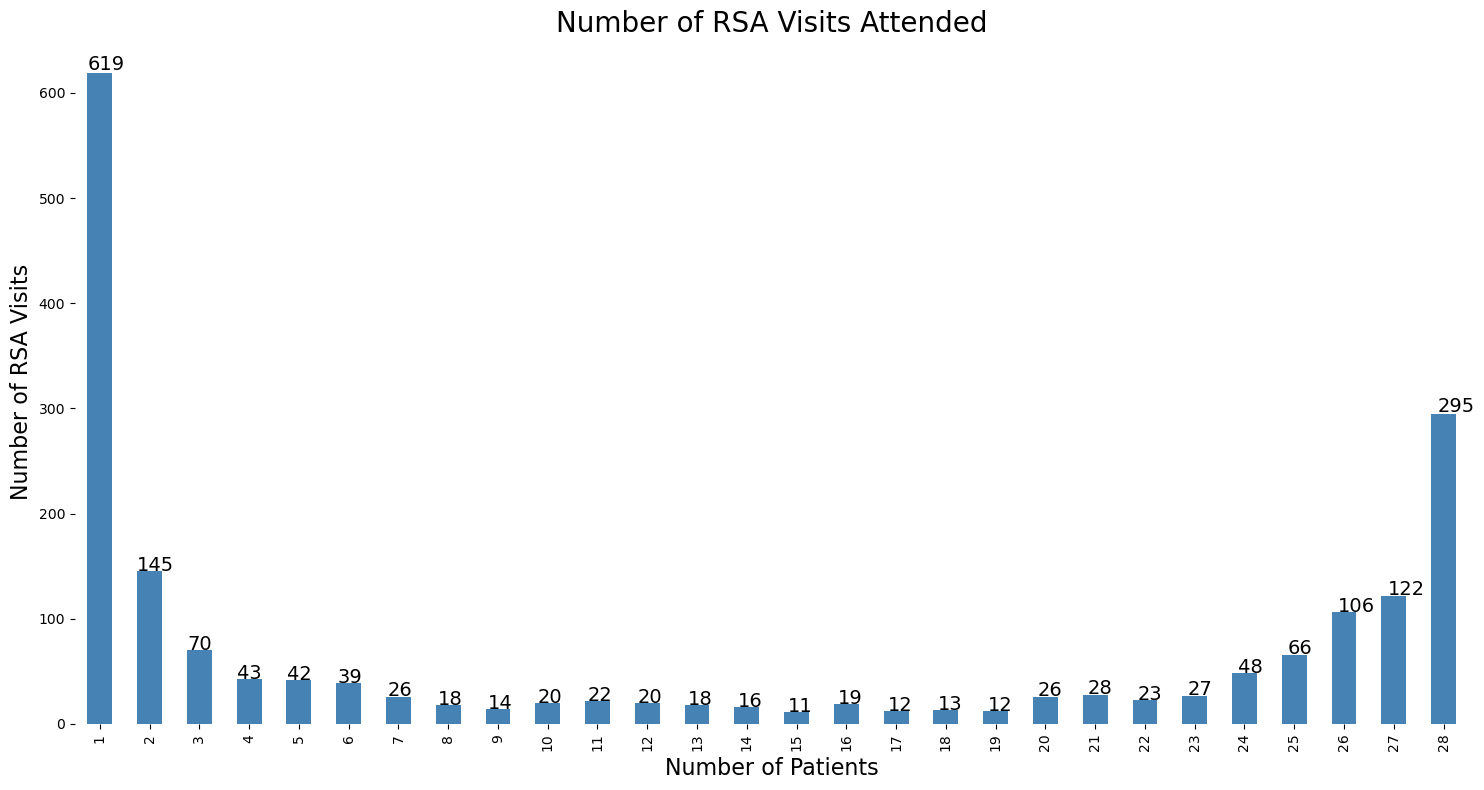

In [8]:
ax = rsa.total_rsa.value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(15,8), color='steelblue')
ax.set_title('Number of RSA Visits Attended', fontsize=20)
ax.set_xlabel('Number of Patients', fontsize=16)
ax.set_ylabel('Number of RSA Visits', fontsize=16)
# annotate bars with values at the center of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=14)
# remove border on top and right of plot
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
plt.show()

In [9]:
ae = pd.read_csv('../data/raw_data_files/ae.csv')

ae

,PATIENTNUMBER,MERGE_DATETIME,STATUS,ENTRY_ID,ENTRY_DATETIME,CT_RECID,DB_ID,SUBJECT_ID,CTS_REASON,CTPROT,...,WORKFLOW,CODETM,CODER,CONFLVL,MATCHES,VISWKAE,AE010_DT,AE003A_DT,VSDTAE_DT,patdeid
0,NaN,17736.434769,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,INT,NaN,NaN,NaN,NaN,6.0,63.0,40.0,40.0,1.0
1,NaN,17703.069352,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,AUTO,NaN,NaN,1.0,1.0,8.0,54.0,49.0,-312.0,1.0
2,NaN,17755.421574,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,INT,NaN,NaN,NaN,NaN,11.0,88.0,71.0,78.0,1.0
3,NaN,17755.421574,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,AUTO,NaN,NaN,1.0,1.0,11.0,88.0,76.0,78.0,1.0
4,NaN,17820.417685,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,AUTO,NaN,NaN,1.0,1.0,14.0,141.0,88.0,98.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,NaN,17700.485949,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,AUTO,NaN,NaN,1.0,1.0,4.0,49.0,24.0,28.0,1925.0
5146,NaN,18518.479549,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,AUTO,NaN,NaN,1.0,1.0,11.0,NaN,NaN,NaN,1928.0
5147,NaN,18519.591794,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,INT,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,1928.0
5148,NaN,17870.408843,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,INT,NaN,NaN,NaN,NaN,3.0,28.0,14.0,19.0,1929.0


In [10]:
ae.columns

Index(['PATIENTNUMBER', 'MERGE_DATETIME', 'STATUS', 'ENTRY_ID',
       'ENTRY_DATETIME', 'CT_RECID', 'DB_ID', 'SUBJECT_ID', 'CTS_REASON',
       'CTPROT', 'INVSITE', 'PATID', 'SUBJNO', 'INITIALS', 'FORM', 'BLOCKREP',
       'PAGEID', 'PAGEREP', 'CRFPAGE', 'NODATA', 'VSDTAE', 'VSWKAE', 'AE002',
       'AE003', 'AE003A', 'AE004', 'AE005A', 'AE005B', 'AE005C', 'AE005D',
       'AE005E', 'AE005F', 'AE005G', 'AE005H', 'AE005I', 'AE006', 'AE007',
       'AE008', 'AE009', 'AE010', 'AE011', 'PATIENTID', 'VISITID',
       'VISITINDEX', 'FORMINDEX', 'ITEMSETINDEX', 'MEDRTEXT', 'MEDRCODE',
       'WORKFLOW', 'CODETM', 'CODER', 'CONFLVL', 'MATCHES', 'VISWKAE',
       'AE010_DT', 'AE003A_DT', 'VSDTAE_DT', 'patdeid'],
      dtype='object')

In [11]:
keep_cols = [col for col in ae.columns if col not in ['AE002','AE003','AE004','AE005C','AE005D','AE005G','AE005H','patdeid']]

rename_cols = {'AE002':'event_num','AE003':'adverse_event','AE004':'severity','AE005C':'increase_drug','AE005D':'reduced_drug','AE005G':'stop_methadone','AE005H':'stop_buprenorphine'}

ae = ae.drop(columns=keep_cols)

ae = ae.rename(columns=rename_cols)

# move last column to first position
cols = ae.columns.tolist()
cols = cols[-1:] + cols[:-1]
ae = ae[cols]

ae

,patdeid,event_num,adverse_event,severity,increase_drug,reduced_drug,stop_methadone,stop_buprenorphine
0,1.0,1.0,PARESTHESIAS OF LEFT ARM IN ULNAR DISTRIBUTION,1,NaN,NaN,NaN,NaN
1,1.0,2.0,SCINTILLATING SCOTOMA,2,NaN,4.0,NaN,NaN
2,1.0,3.0,WORSENING CONSTIPATION,2,NaN,NaN,NaN,NaN
3,1.0,4.0,HEMATOCHEZIA,1,NaN,NaN,NaN,NaN
4,1.0,5.0,URINARY HESITANCY,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5145,1925.0,1.0,NASAL STUFFINESS,1,NaN,NaN,NaN,NaN
5146,1928.0,2.0,VIRAL SYNDROME,1,NaN,NaN,NaN,NaN
5147,1928.0,3.0,PER PA RECOLLECTION PROBABLY SOFT TISSUE EDEMA.,1,NaN,NaN,NaN,NaN
5148,1929.0,1.0,SCABS ON THE FACE,1,NaN,NaN,NaN,NaN


In [12]:
ae['adverse_event'] = ae.adverse_event.fillna('None')

ae

,patdeid,event_num,adverse_event,severity,increase_drug,reduced_drug,stop_methadone,stop_buprenorphine
0,1.0,1.0,PARESTHESIAS OF LEFT ARM IN ULNAR DISTRIBUTION,1,NaN,NaN,NaN,NaN
1,1.0,2.0,SCINTILLATING SCOTOMA,2,NaN,4.0,NaN,NaN
2,1.0,3.0,WORSENING CONSTIPATION,2,NaN,NaN,NaN,NaN
3,1.0,4.0,HEMATOCHEZIA,1,NaN,NaN,NaN,NaN
4,1.0,5.0,URINARY HESITANCY,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5145,1925.0,1.0,NASAL STUFFINESS,1,NaN,NaN,NaN,NaN
5146,1928.0,2.0,VIRAL SYNDROME,1,NaN,NaN,NaN,NaN
5147,1928.0,3.0,PER PA RECOLLECTION PROBABLY SOFT TISSUE EDEMA.,1,NaN,NaN,NaN,NaN
5148,1929.0,1.0,SCABS ON THE FACE,1,NaN,NaN,NaN,NaN


In [13]:
# return values in adverse_event column that contain the word "Suicide"
ae.loc[ae['adverse_event'].str.contains('Suicide', case=False)]

,patdeid,event_num,adverse_event,severity,increase_drug,reduced_drug,stop_methadone,stop_buprenorphine
257,108.0,2.0,SUICIDE ATTEMPT,2,NaN,NaN,NaN,NaN
885,350.0,2.0,SUICIDE IDEATION - NO PLAN,1,NaN,NaN,NaN,NaN
1075,422.0,9.0,SUICIDE ATTEMPT AT DETOX FACILITY,2,NaN,NaN,NaN,NaN
1076,422.0,10.0,REPORTED SUICIDE ATTEMPT TO COUNSELOR,2,NaN,NaN,NaN,NaN
1459,570.0,5.0,"DRUG OVERDOSE, INTOXICATION AND SUICIDE ATTEMPT",3,NaN,NaN,NaN,NaN
1981,765.0,9.0,SUICIDE ATTEMPT - CUT WRISTS,4,NaN,NaN,NaN,NaN
1982,765.0,10.0,ATTEMPTED SUICIDE - HEROIN OVERDOSE,4,NaN,NaN,NaN,NaN
2740,1034.0,2.0,"SUICIDE ATTEMPT , OVERDOSE",4,NaN,NaN,NaN,NaN
2742,1034.0,4.0,"SUICIDE ATTEMPT,OVERDOSE",3,NaN,NaN,NaN,NaN
3437,1301.0,5.0,SUICIDE PLAN OF OVERDOSING ON HEROIN,4,NaN,NaN,NaN,NaN


In [14]:
# get word count for adverse_event column in ae dataframe
ae['word_count'] = ae['adverse_event'].str.split().apply(len)
ae


,patdeid,event_num,adverse_event,severity,increase_drug,reduced_drug,stop_methadone,stop_buprenorphine,word_count
0,1.0,1.0,PARESTHESIAS OF LEFT ARM IN ULNAR DISTRIBUTION,1,NaN,NaN,NaN,NaN,7
1,1.0,2.0,SCINTILLATING SCOTOMA,2,NaN,4.0,NaN,NaN,2
2,1.0,3.0,WORSENING CONSTIPATION,2,NaN,NaN,NaN,NaN,2
3,1.0,4.0,HEMATOCHEZIA,1,NaN,NaN,NaN,NaN,1
4,1.0,5.0,URINARY HESITANCY,1,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
5145,1925.0,1.0,NASAL STUFFINESS,1,NaN,NaN,NaN,NaN,2
5146,1928.0,2.0,VIRAL SYNDROME,1,NaN,NaN,NaN,NaN,2
5147,1928.0,3.0,PER PA RECOLLECTION PROBABLY SOFT TISSUE EDEMA.,1,NaN,NaN,NaN,NaN,7
5148,1929.0,1.0,SCABS ON THE FACE,1,NaN,NaN,NaN,NaN,4


In [ ]:
# plot top 20 words in word counts



In [15]:
word_counts = ae['adverse_event'].str.split().explode().value_counts().reset_index()
word_counts.columns = ['Word', 'Count']
word_counts[:25]


,Word,Count
0,PAIN,384
1,CLINICALLY,370
2,ELEVATED,361
3,SIGNIFICANT,359
4,INCREASED,336
5,COLD,310
6,OF,301
7,RIGHT,282
8,LEFT,280
9,FROM,277
